In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessing
import wrangle

In [299]:
app = wrangle.get_application_data('application_record.csv')

In [300]:
expanded_report, score_report, full_cred_hist = wrangle.get_reports_data('credit_record.csv')

In [301]:
full_cred_hist[full_cred_hist.account_months > 6]

,id,account_months,status,1month_ago,2month_ago,3month_ago,4month_ago,5month_ago,6month_ago,7month_ago,...,51month_ago,52month_ago,53month_ago,54month_ago,55month_ago,56month_ago,57month_ago,58month_ago,59month_ago,60month_ago
1,5001712,18,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5001713,21,X,X,X,X,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5001714,14,X,X,X,X,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5001715,59,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,NaN
5,5001717,21,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45979,5150481,42,X,X,X,X,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45980,5150482,28,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45981,5150483,17,X,X,X,X,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45982,5150484,12,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Explore**

In [302]:
app.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,employed_years,age
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,Other,2.0,12.0,32.0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,Other,2.0,12.0,32.0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,Security staff,2.0,3.0,58.0
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0,8.0,52.0
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0,8.0,52.0


In [303]:
app.describe().T

,count,mean,std,min,25%,50%,75%,max
flag_own_car,438557.0,0.371897,0.483312,0.000000,0.0,0.0,1.0,1.0
flag_own_realty,438557.0,0.693351,0.461103,0.000000,0.0,1.0,1.0,1.0
cnt_children,438557.0,0.427390,0.724882,0.000000,0.0,0.0,1.0,19.0
amt_income_total,438557.0,187524.286010,110086.853066,26100.000000,121500.0,160780.5,225000.0,6750000.0
days_birth,438557.0,15997.904649,4185.030007,7489.000000,12514.0,15630.0,19483.0,25201.0
days_employed,438557.0,4544.300267,4774.087730,12.000000,1093.0,2513.0,5823.0,17531.0
flag_mobil,438557.0,1.000000,0.000000,1.000000,1.0,1.0,1.0,1.0
flag_work_phone,438557.0,0.206133,0.404527,0.000000,0.0,0.0,0.0,1.0
flag_phone,438557.0,0.287771,0.452724,0.000000,0.0,0.0,1.0,1.0
flag_email,438557.0,0.108207,0.310642,0.000000,0.0,0.0,0.0,1.0


In [304]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   438557 non-null  object 
 1   code_gender          438557 non-null  object 
 2   flag_own_car         438557 non-null  int64  
 3   flag_own_realty      438557 non-null  int64  
 4   cnt_children         438557 non-null  int64  
 5   amt_income_total     438557 non-null  float64
 6   name_income_type     438557 non-null  object 
 7   name_education_type  438557 non-null  object 
 8   name_family_status   438557 non-null  object 
 9   name_housing_type    438557 non-null  object 
 10  days_birth           438557 non-null  int64  
 11  days_employed        438557 non-null  int64  
 12  flag_mobil           438557 non-null  int64  
 13  flag_work_phone      438557 non-null  int64  
 14  flag_phone           438557 non-null  int64  
 15  flag_email       

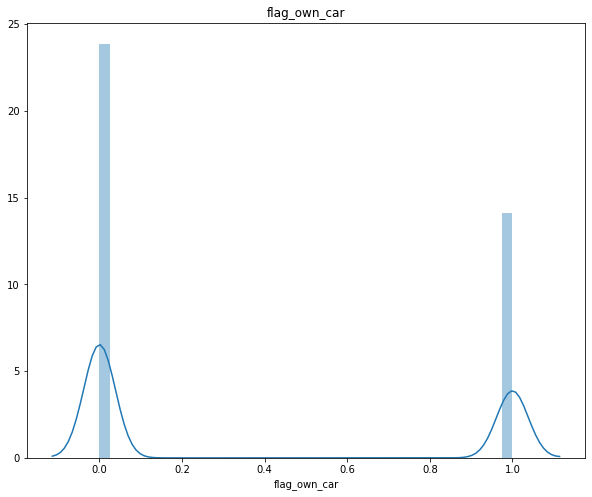

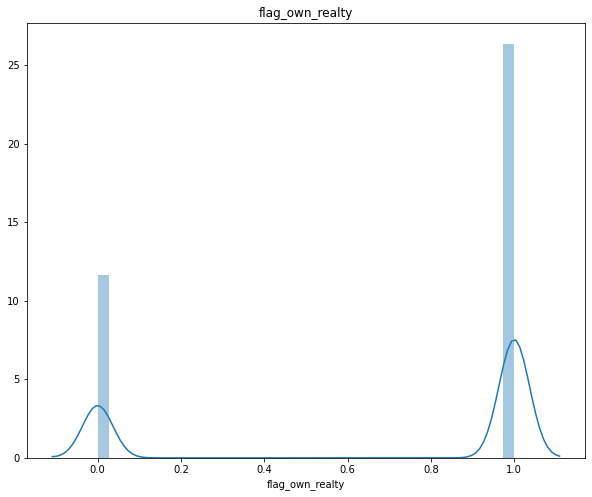

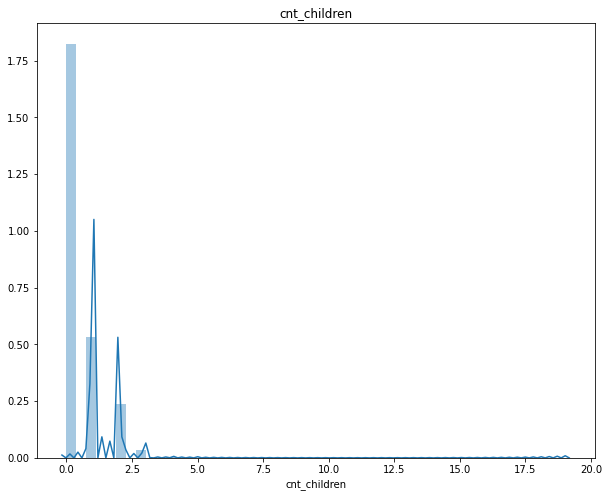

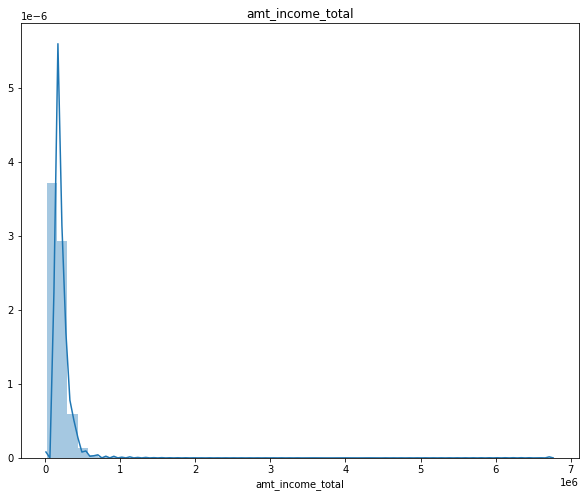

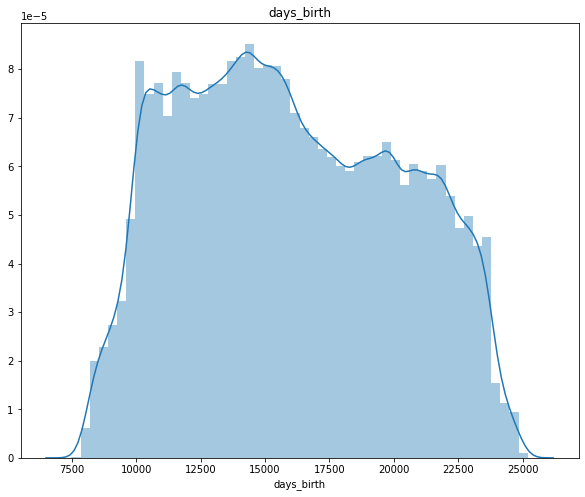

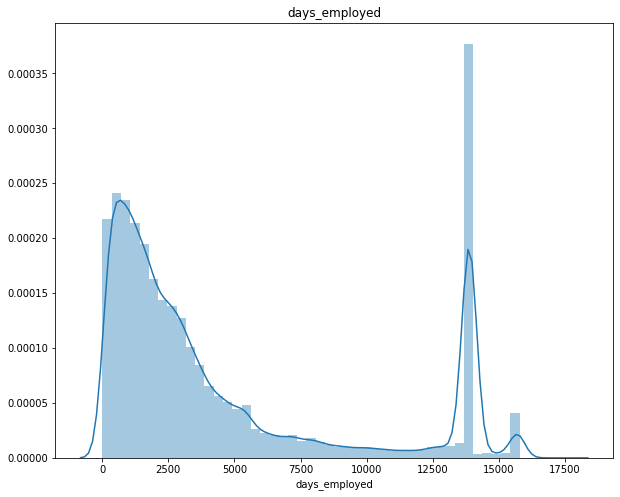

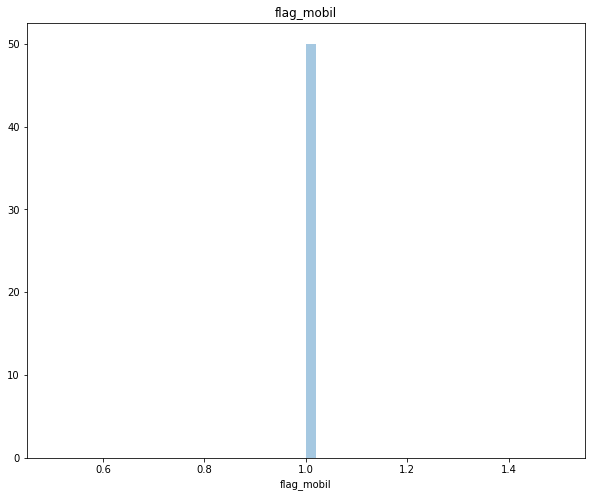

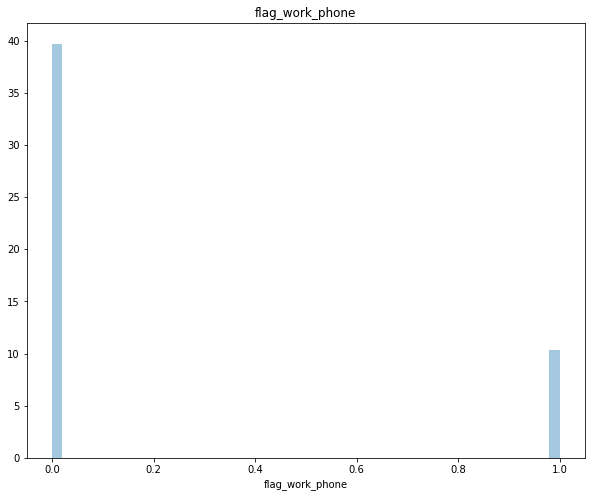

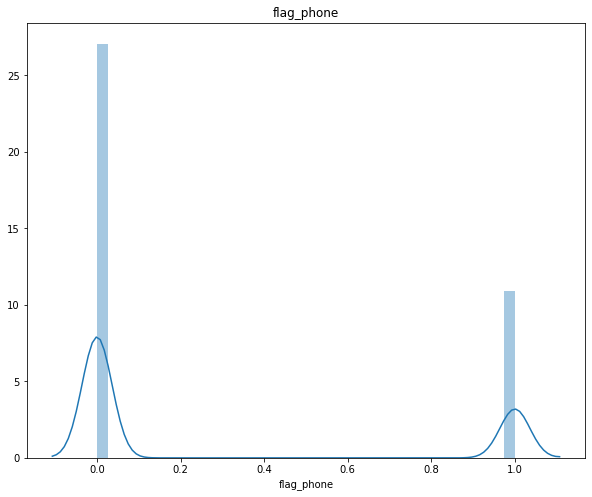

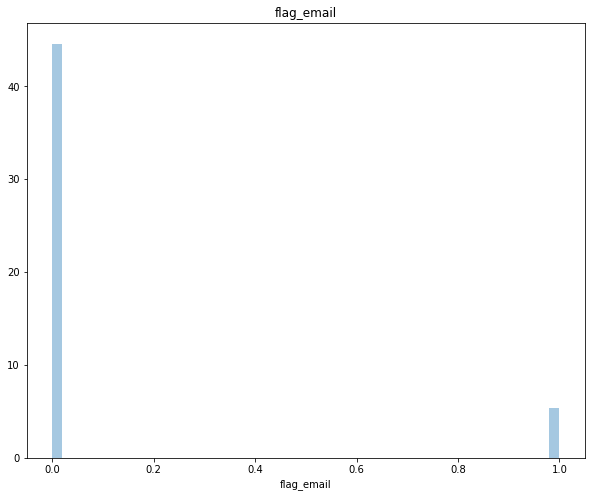

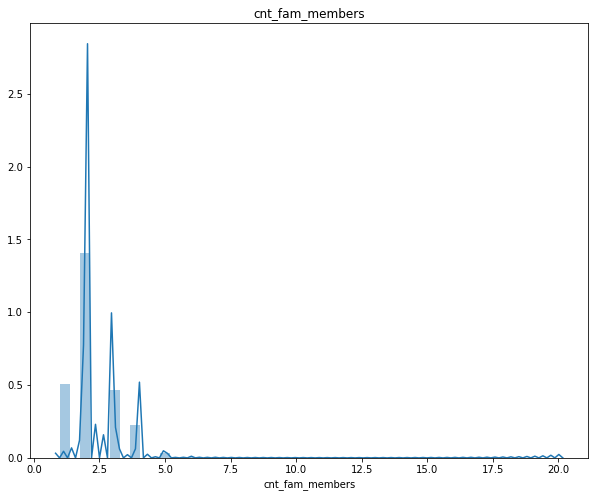

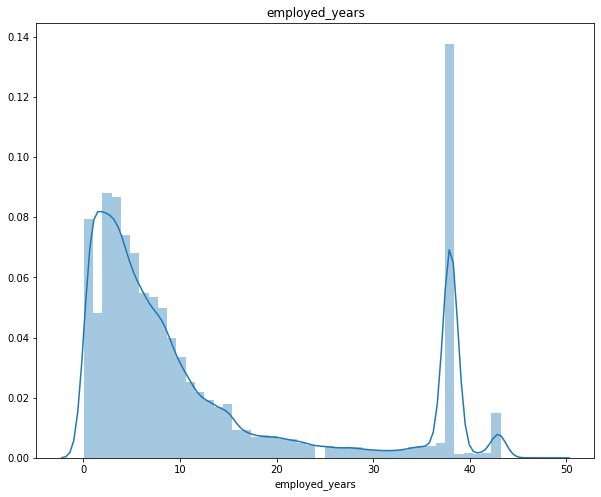

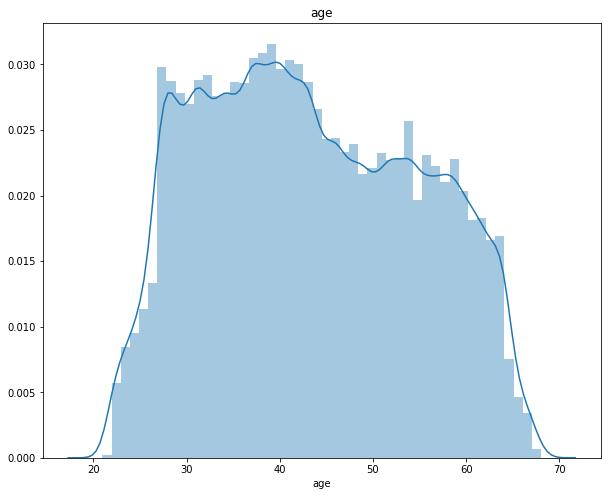

In [305]:
# lets get the distribution of the numeric data type
for col in app.columns:
    if (app[col].dtype == int) or (app[col].dtype == float):
        sns.distplot(app[col])
        plt.title(col)
        plt.show()
    

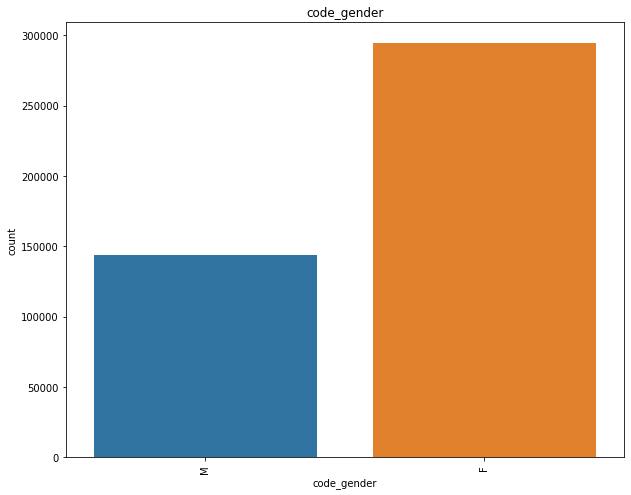

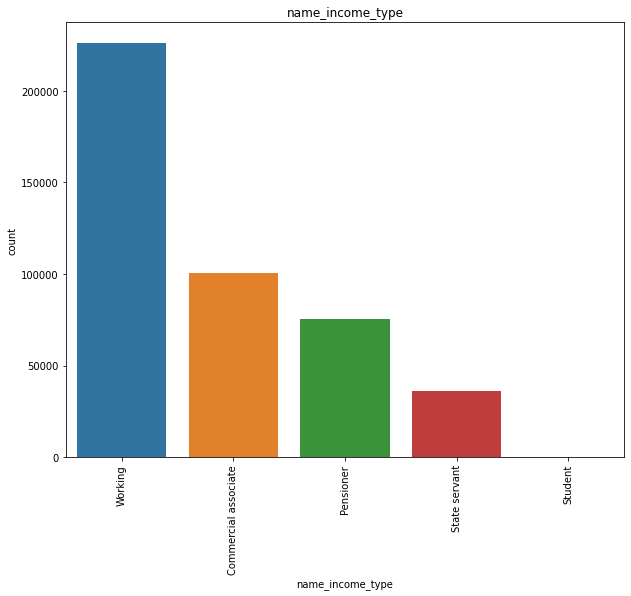

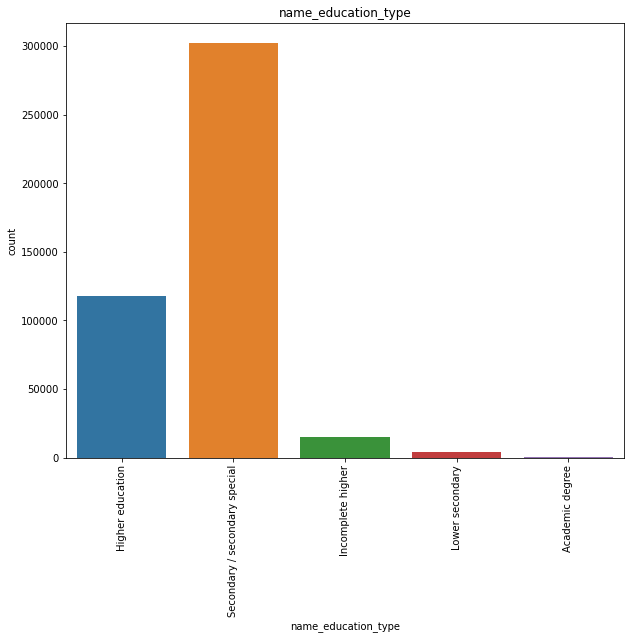

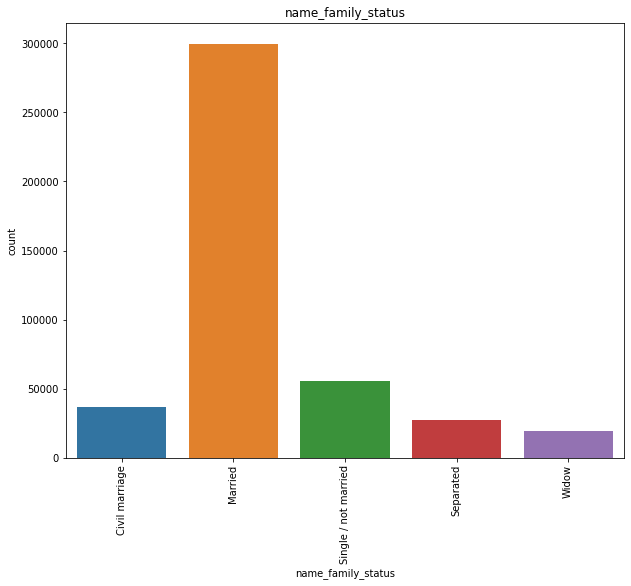

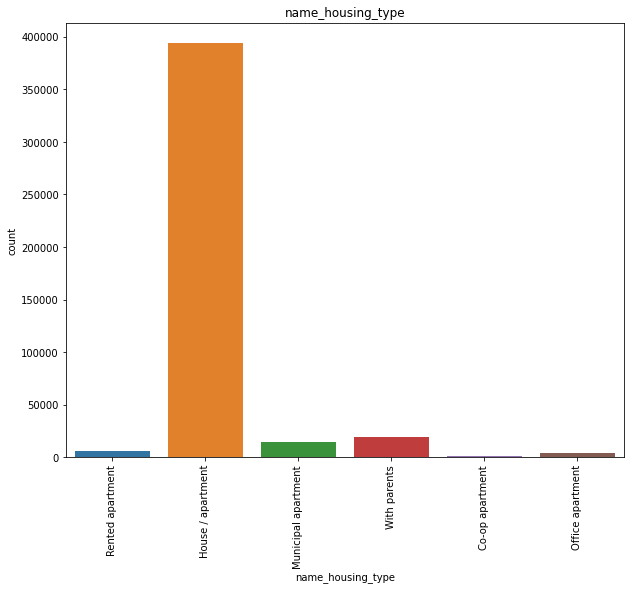

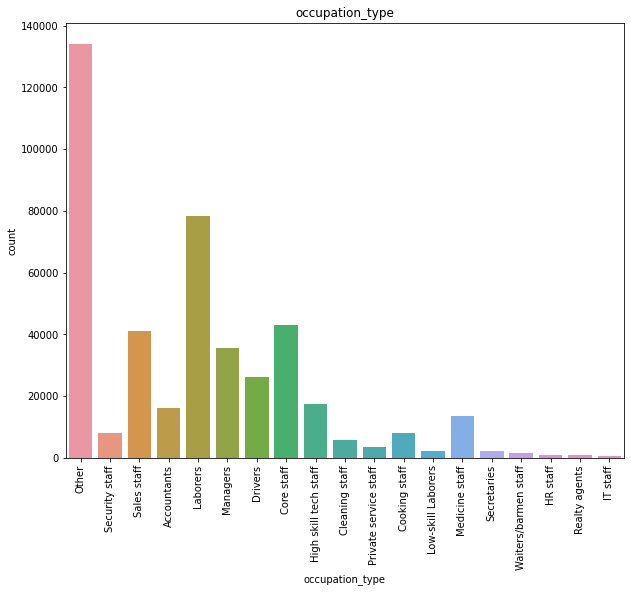

In [306]:
# lets get the count of the variables of object data type

plt.rc('figure', figsize = (10,8))
cols = ['code_gender','name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type','occupation_type']


for col in cols:
    sns.countplot(app[col])
    plt.title(col)
    plt.xticks(rotation = 90)
    plt.show()

<AxesSubplot:xlabel='name_income_type'>

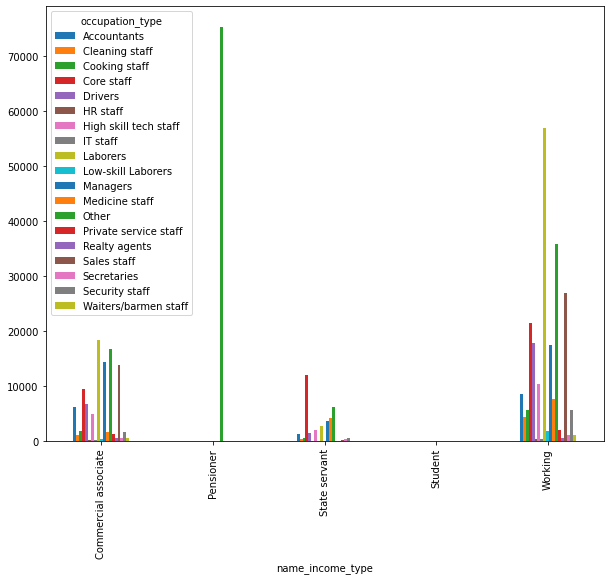

In [307]:
# lets see how many different occupation type each income type has

pd.crosstab(app.name_income_type, app.occupation_type).plot(kind = 'bar')

In [308]:
# lets add credit score for our application
# this function splits the dataframe into two, one with the ids that have credit hist, another one with ids without
# credit history

app_cred, apps_none = preprocessing.add_score_target(app,score_report)

In [309]:
app_cred

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,...,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,employed_years,age,score
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,4542,1,1,0,0,Other,2.0,12.0,32.0,33.0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,4542,1,1,0,0,Other,2.0,12.0,32.0,31.0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1134,1,0,0,0,Security staff,2.0,3.0,58.0,2.0
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,3051,1,0,1,1,Sales staff,1.0,8.0,52.0,1.0
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,3051,1,0,1,1,Sales staff,1.0,8.0,52.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,1,1,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,2420,1,0,0,0,Managers,2.0,7.0,47.0,18.0
36453,5149834,F,0,1,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,1325,1,0,1,1,Medicine staff,2.0,4.0,33.0,108.0
36454,5149838,F,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,1325,1,0,1,1,Medicine staff,2.0,4.0,33.0,126.0
36455,5150049,F,0,1,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,655,1,0,0,0,Sales staff,2.0,2.0,49.0,25.0


In [310]:
apps_none

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,employed_years,age
0,6153651,M,1,1,0,270000.0,Working,Higher education,Married,House / apartment,16872,769,1,1,1,1,Accountants,2.0,2.0,46.0
1,6153712,F,0,1,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,10968,1620,1,0,0,0,Other,2.0,4.0,30.0
2,6153733,M,1,1,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,20502,4450,1,0,1,0,Drivers,2.0,12.0,56.0
3,6153734,M,1,1,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,20502,4450,1,0,1,0,Drivers,2.0,12.0,56.0
4,6153735,M,1,1,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,20502,4450,1,0,1,0,Drivers,2.0,12.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402095,6840104,M,0,1,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,22717,15705,1,0,0,0,Other,1.0,43.0,62.0
402096,6840222,F,0,0,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,15939,3007,1,0,0,0,Laborers,1.0,8.0,43.0
402097,6841878,F,0,0,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,8169,372,1,1,0,0,Sales staff,1.0,1.0,22.0
402098,6842765,F,0,1,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,21673,13879,1,0,0,0,Other,2.0,38.0,59.0


**As we can see there are only 36457 unique IDs that have credit history and there are 402100 without credit history**

In [311]:
# lets get some descriptive stats on the data
app_cred.describe()

,flag_own_car,flag_own_realty,cnt_children,amt_income_total,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,cnt_fam_members,employed_years,age,score
count,36457.000000,36457.000000,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,0.379708,0.672189,0.430315,1.866857e+05,15975.173382,4520.372274,1.0,0.225526,0.294813,0.089722,2.198453,12.386805,43.260334,26.002085
std,0.485321,0.469422,0.742367,1.017892e+05,4200.549944,4716.486206,0.0,0.417934,0.455965,0.285787,0.911686,12.914111,11.510414,31.603757
min,0.000000,0.000000,0.000000,2.700000e+04,7489.000000,17.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.046575,20.000000,-81.000000
25%,0.000000,0.000000,0.000000,1.215000e+05,12462.000000,1169.000000,1.0,0.000000,0.000000,0.000000,2.000000,3.000000,34.000000,7.000000
50%,0.000000,1.000000,0.000000,1.575000e+05,15563.000000,2517.000000,1.0,0.000000,0.000000,0.000000,2.000000,7.000000,42.000000,24.000000
75%,1.000000,1.000000,1.000000,2.250000e+05,19438.000000,5649.000000,1.0,0.000000,1.000000,0.000000,3.000000,15.000000,53.000000,43.000000
max,1.000000,1.000000,19.000000,1.575000e+06,25152.000000,15713.000000,1.0,1.000000,1.000000,1.000000,20.000000,43.000000,68.000000,337.000000


In [312]:
# lets get some information about the data
app_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   36457 non-null  object 
 1   code_gender          36457 non-null  object 
 2   flag_own_car         36457 non-null  int64  
 3   flag_own_realty      36457 non-null  int64  
 4   cnt_children         36457 non-null  int64  
 5   amt_income_total     36457 non-null  float64
 6   name_income_type     36457 non-null  object 
 7   name_education_type  36457 non-null  object 
 8   name_family_status   36457 non-null  object 
 9   name_housing_type    36457 non-null  object 
 10  days_birth           36457 non-null  int64  
 11  days_employed        36457 non-null  int64  
 12  flag_mobil           36457 non-null  int64  
 13  flag_work_phone      36457 non-null  int64  
 14  flag_phone           36457 non-null  int64  
 15  flag_email           36457 non-null 

<AxesSubplot:xlabel='age'>

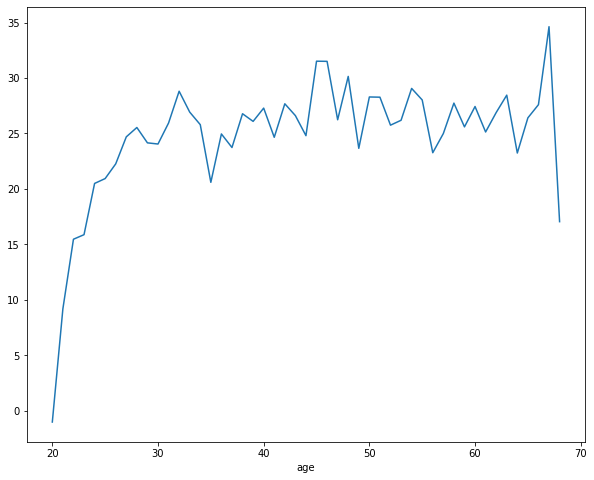

In [313]:
# lets explore if there is any relationship between our variables and the credit score

# lets see how average credit score moves with age
app_cred.groupby('age').score.mean().plot()



**Perform statistical test for above relationship. The credit score seems to increase with age**

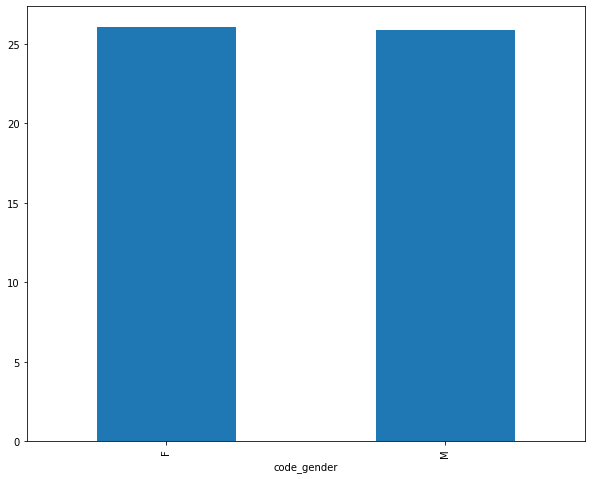

In [314]:
# lets see how credit score varies by gender
app_cred.groupby('code_gender').score.mean().plot(kind = 'bar')
plt.show()

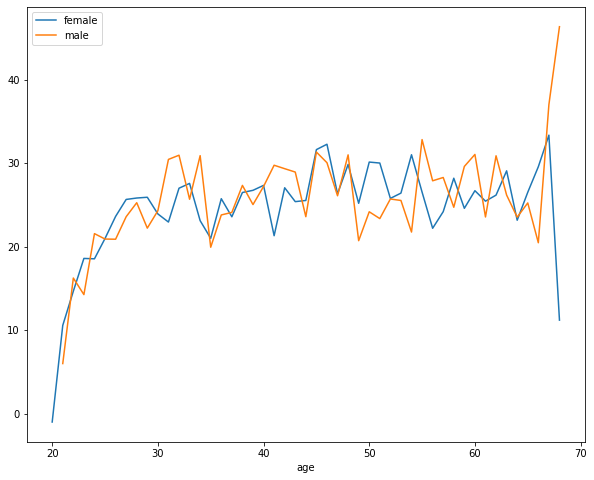

In [315]:
# lets see how credit varies by age for males and females

app_cred[app_cred.code_gender == 'F'].groupby('age').score.mean().plot(label = 'female')
app_cred[app_cred.code_gender == 'M'].groupby('age').score.mean().plot(label = 'male')
plt.legend()
plt.show()

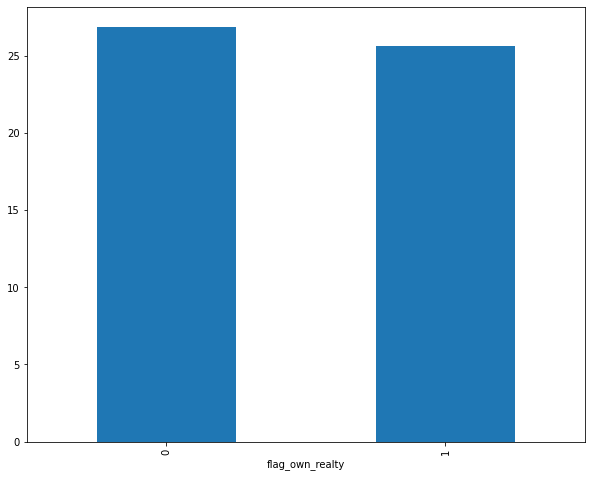

In [316]:
# lets see how the average credit score looks for people who own realty vs those who dont
app_cred.groupby('flag_own_realty').score.mean().plot(kind = 'bar')
plt.show()

<AxesSubplot:xlabel='flag_own_realty', ylabel='score'>

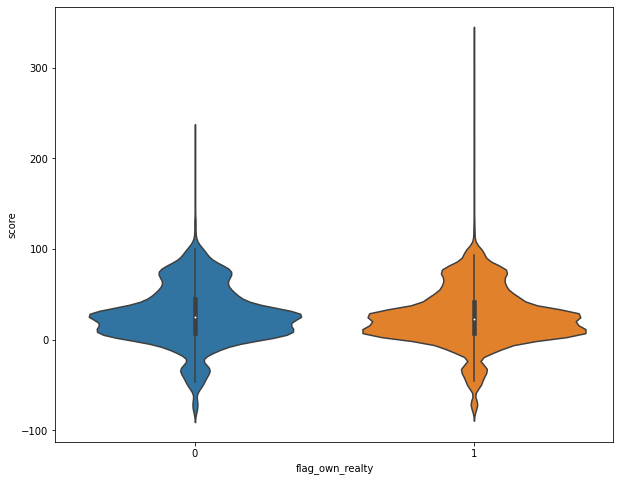

In [317]:
# lets check how the score is distributed between these two groups
sns.violinplot(app_cred.flag_own_realty, app_cred.score)

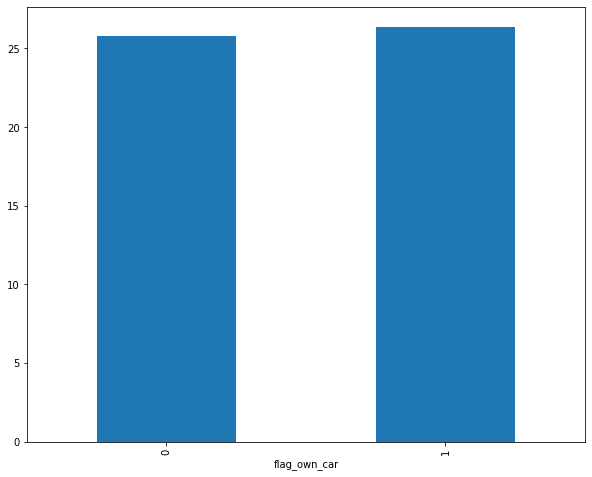

In [318]:
# lets see how the average credit score looks for people who own car vs those who dont

app_cred.groupby('flag_own_car').score.mean().plot(kind = 'bar')
plt.show()

<AxesSubplot:xlabel='flag_own_car', ylabel='score'>

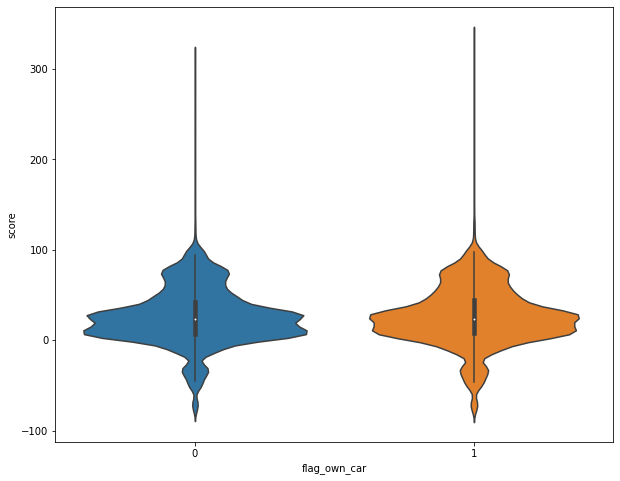

In [319]:
# lets see how the score is distributed between these two groups
sns.violinplot(app_cred.flag_own_car, app_cred.score)

<AxesSubplot:xlabel='cnt_children', ylabel='score'>

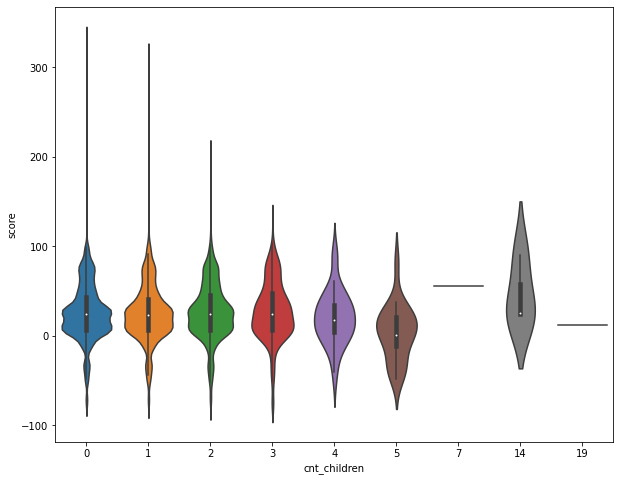

In [320]:
# lets see how the credit score distributes for applicant with different number of childern

sns.violinplot(app_cred.cnt_children, app_cred.score)

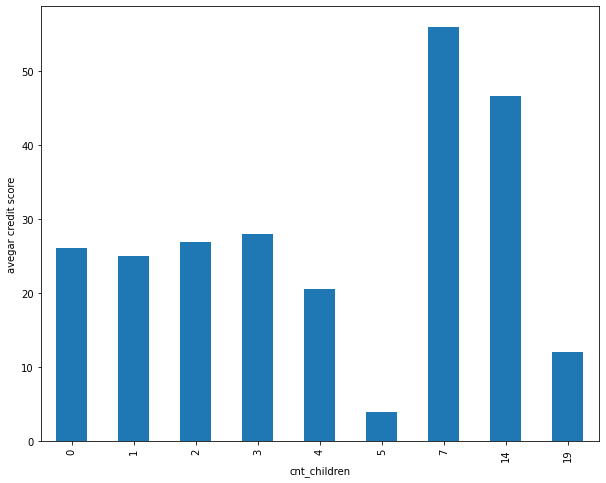

In [321]:
# lets check the average credit score for applicants with different number of children
app_cred.groupby('cnt_children').score.mean().plot(kind = 'bar')
plt.ylabel('avegar credit score')
plt.show()

<AxesSubplot:xlabel='amt_income_total', ylabel='score'>

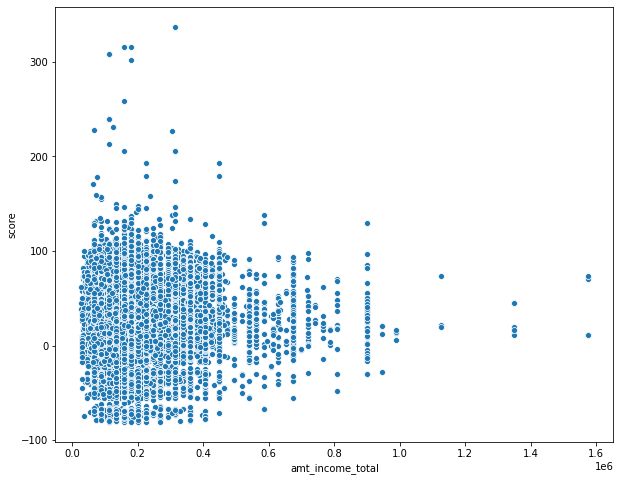

In [322]:
# lets check how the credit changes with annual income
sns.scatterplot(app_cred.amt_income_total, app_cred.score)

<AxesSubplot:xlabel='name_income_type'>

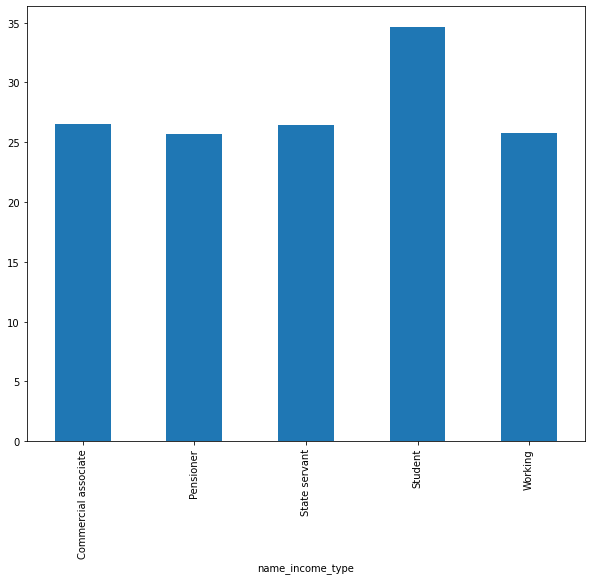

In [323]:
# lets check how the credit score changes for different income type
app_cred.groupby('name_income_type').score.mean().plot.bar()

<AxesSubplot:xlabel='score'>

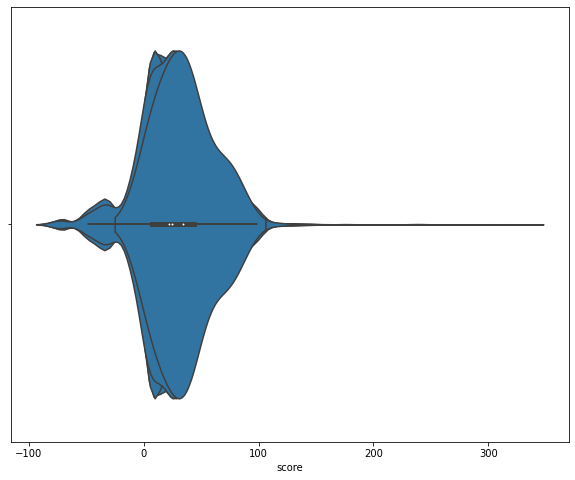

In [324]:
sns.violinplot(app_cred[app_cred.name_income_type == 'Working'].score)
sns.violinplot(app_cred[app_cred.name_income_type == 'Commercial associate'].score)
sns.violinplot(app_cred[app_cred.name_income_type == 'Pensioner'].score)
sns.violinplot(app_cred[app_cred.name_income_type == 'State servant'].score)
sns.violinplot(app_cred[app_cred.name_income_type == 'Student'].score)







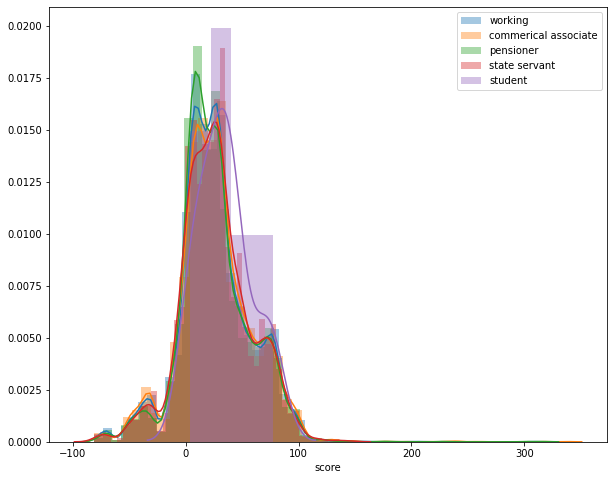

In [325]:
sns.distplot(app_cred[app_cred.name_income_type == 'Working'].score, label = 'working')
sns.distplot(app_cred[app_cred.name_income_type == 'Commercial associate'].score, label = 'commerical associate')
sns.distplot(app_cred[app_cred.name_income_type == 'Pensioner'].score, label = 'pensioner')
sns.distplot(app_cred[app_cred.name_income_type == 'State servant'].score, label = 'state servant')
sns.distplot(app_cred[app_cred.name_income_type == 'Student'].score, label = 'student')
plt.legend()
plt.show()

**There is somewhat difference in the credit score between the different income type groups. Can perform statistical test to verify**

<AxesSubplot:xlabel='name_education_type'>

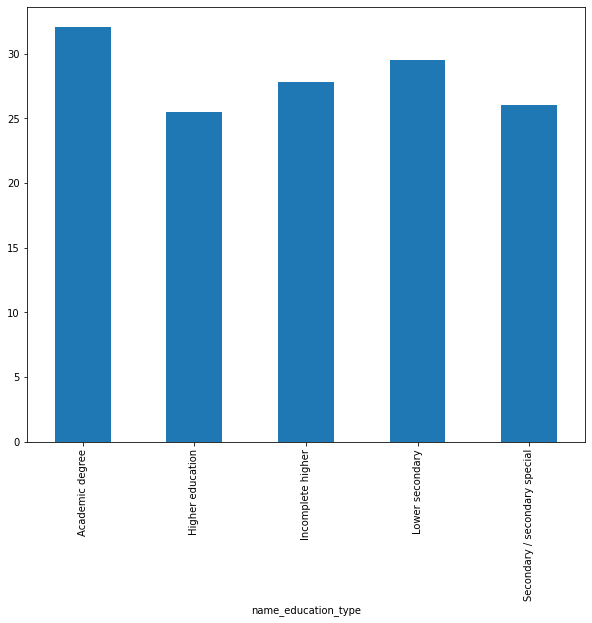

In [326]:
# lets check how the credit score changes for different education type
app_cred.groupby('name_education_type').score.mean().plot.bar()

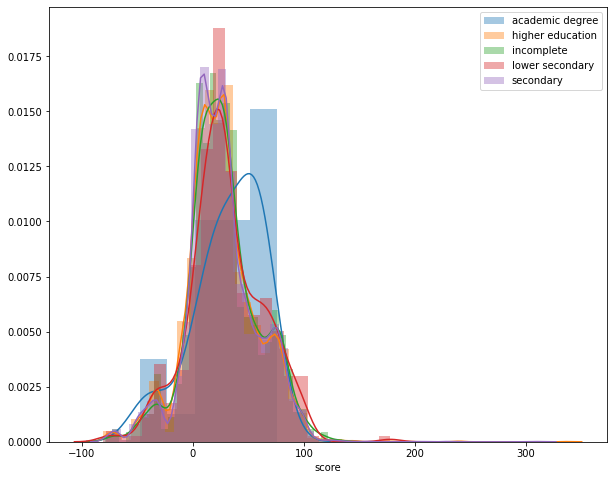

In [327]:
# lets plot the distribution of these various education levels and the credit score for that group

sns.distplot(app_cred[app_cred.name_education_type == 'Academic degree'].score, label = 'academic degree')
sns.distplot(app_cred[app_cred.name_education_type == 'Higher education'].score, label = 'higher education')
sns.distplot(app_cred[app_cred.name_education_type == 'Incomplete higher'].score, label = 'incomplete')
sns.distplot(app_cred[app_cred.name_education_type == 'Lower secondary'].score, label = 'lower secondary')
sns.distplot(app_cred[app_cred.name_education_type == 'Secondary / secondary special'].score, label = 'secondary')
plt.legend()
plt.show()

**We can run statistical test to see if there is any significant difference in scores between groups with different degrees**

In [328]:
app_cred.name_family_status.value_counts()

Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: name_family_status, dtype: int64

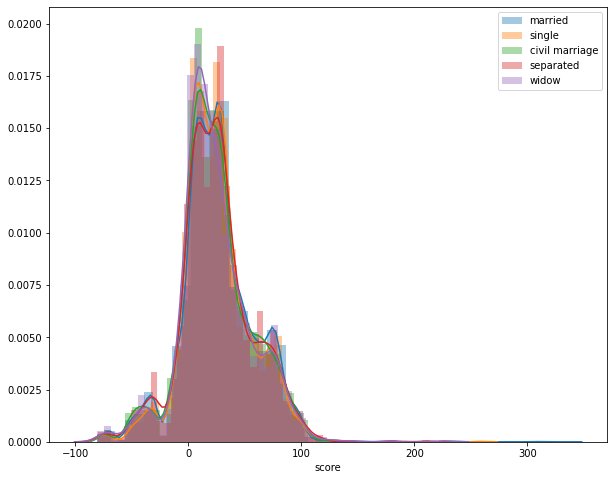

In [329]:
# lets plot the distribution of various family status the credit score for that group

sns.distplot(app_cred[app_cred.name_family_status == 'Married'].score, label = 'married')
sns.distplot(app_cred[app_cred.name_family_status == 'Single / not married'].score, label = 'single')
sns.distplot(app_cred[app_cred.name_family_status == 'Civil marriage'].score, label = 'civil marriage')
sns.distplot(app_cred[app_cred.name_family_status == 'Separated'].score, label = 'separated')
sns.distplot(app_cred[app_cred.name_family_status == 'Widow'].score, label = 'widow')
plt.legend()
plt.show() 

**The distribution looks same for all different classes of family status. we can perform statistical test, however, 
there seems to be no difference in credit score**

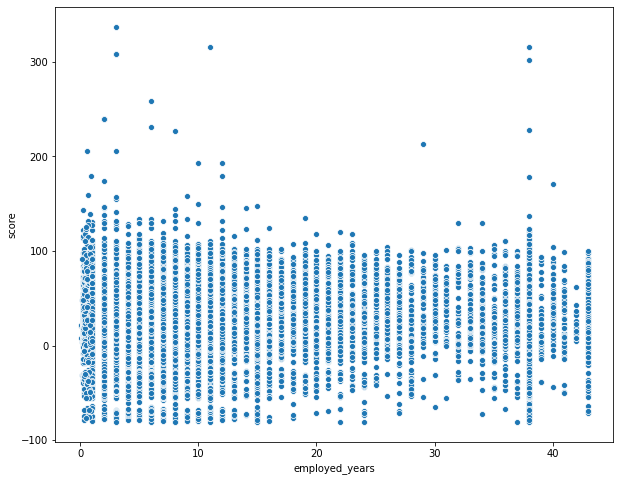

In [330]:
# lets see how the credit score varies with length of employment

sns.scatterplot(app_cred.employed_years, app_cred.score)
plt.show()

<AxesSubplot:>

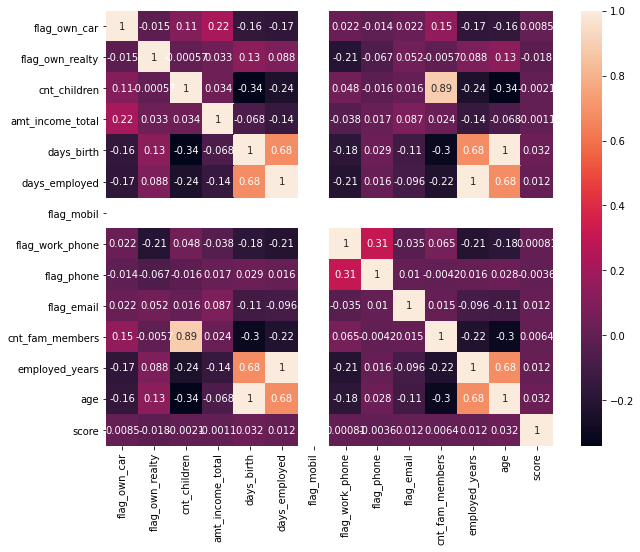

In [331]:
plt.plot(figsize = (12,12))
sns.heatmap(app_cred.corr(), annot = True)

<AxesSubplot:xlabel='code_gender', ylabel='count'>

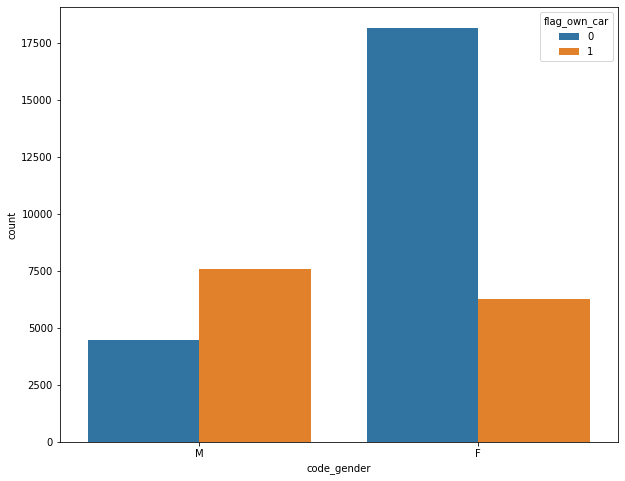

In [332]:
sns.countplot(app_cred.code_gender, hue = app_cred.flag_own_car)

<AxesSubplot:xlabel='code_gender', ylabel='count'>

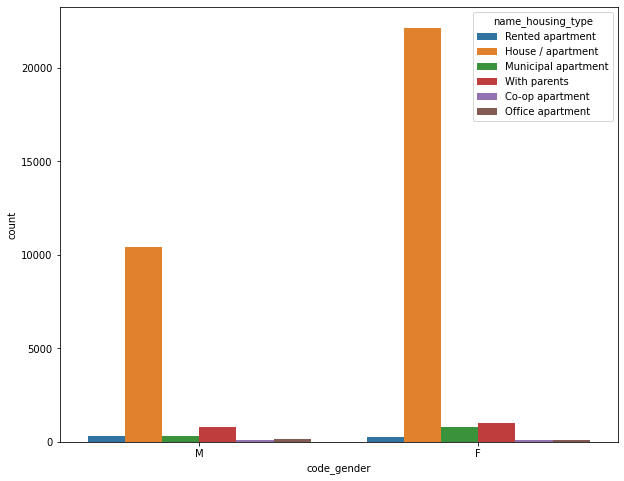

In [333]:
sns.countplot(app_cred.code_gender, hue = app_cred.name_housing_type)

<AxesSubplot:xlabel='code_gender', ylabel='count'>

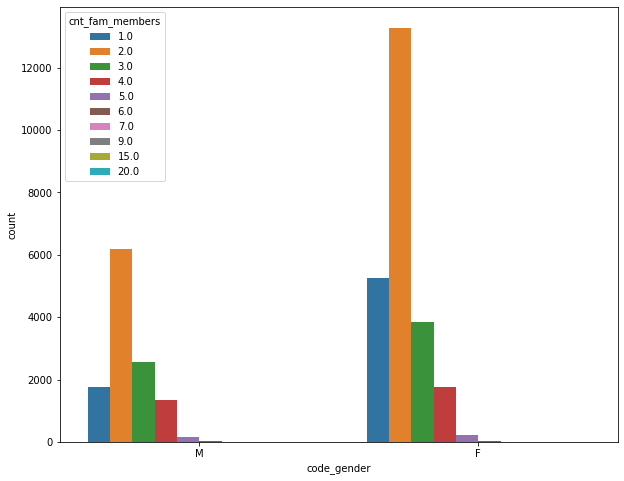

In [334]:
sns.countplot(app_cred.code_gender, hue = app_cred.cnt_fam_members)

<AxesSubplot:xlabel='code_gender', ylabel='count'>

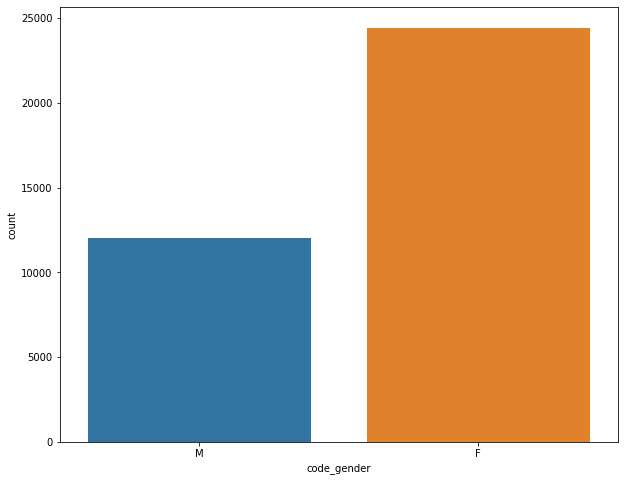

In [335]:
sns.countplot(app_cred.code_gender)

In [336]:
app_cred = preprocessing.encode_dummies(app_cred)

In [337]:
app_cred

,id,flag_own_car,flag_own_realty,cnt_children,amt_income_total,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,...,occupation_type_low-skill_laborers,occupation_type_managers,occupation_type_medicine_staff,occupation_type_other,occupation_type_private_service_staff,occupation_type_realty_agents,occupation_type_sales_staff,occupation_type_secretaries,occupation_type_security_staff,occupation_type_waiters/barmen_staff
0,5008804,1,1,0,427500.0,12005,4542,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,5008805,1,1,0,427500.0,12005,4542,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,5008806,1,1,0,112500.0,21474,1134,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5008808,0,1,0,270000.0,19110,3051,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,5008809,0,1,0,270000.0,19110,3051,1,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,0,315000.0,17348,2420,1,0,0,...,0,1,0,0,0,0,0,0,0,0
36453,5149834,0,1,0,157500.0,12387,1325,1,0,1,...,0,0,1,0,0,0,0,0,0,0
36454,5149838,0,1,0,157500.0,12387,1325,1,0,1,...,0,0,1,0,0,0,0,0,0,0
36455,5150049,0,1,0,283500.0,17958,655,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [338]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [339]:
train, validate, test = preprocessing.split_data(app_cred, pct = 0.10)

In [340]:
train.columns

Index(['id', 'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'days_birth', 'days_employed', 'flag_mobil',
       'flag_work_phone', 'flag_phone', 'flag_email', 'cnt_fam_members',
       'employed_years', 'score', 'name_income_type_commercial_associate',
       'name_income_type_pensioner', 'name_income_type_state_servant',
       'name_income_type_student', 'name_income_type_working',
       'name_education_type_academic_degree',
       'name_education_type_higher_education',
       'name_education_type_incomplete_higher',
       'name_education_type_lower_secondary',
       'name_education_type_secondary_/_secondary_special',
       'name_housing_type_co-op_apartment',
       'name_housing_type_house_/_apartment',
       'name_housing_type_municipal_apartment',
       'name_housing_type_office_apartment',
       'name_housing_type_rented_apartment', 'name_housing_type_with_parents',
       'occupation_type_accountants', 'occupation_type_cleaning_staff',
 

In [341]:
scaler, train_scaled, validate_scaled, test_scaled = preprocessing.standard_scaler(train, validate, test)

In [342]:
train_scaled.columns

Index(['flag_own_car', 'flag_own_realty', 'cnt_children', 'amt_income_total',
       'days_birth', 'days_employed', 'flag_mobil', 'flag_work_phone',
       'flag_phone', 'flag_email', 'cnt_fam_members', 'employed_years',
       'score', 'name_income_type_commercial_associate',
       'name_income_type_pensioner', 'name_income_type_state_servant',
       'name_income_type_student', 'name_income_type_working',
       'name_education_type_academic_degree',
       'name_education_type_higher_education',
       'name_education_type_incomplete_higher',
       'name_education_type_lower_secondary',
       'name_education_type_secondary_/_secondary_special',
       'name_housing_type_co-op_apartment',
       'name_housing_type_house_/_apartment',
       'name_housing_type_municipal_apartment',
       'name_housing_type_office_apartment',
       'name_housing_type_rented_apartment', 'name_housing_type_with_parents',
       'occupation_type_accountants', 'occupation_type_cleaning_staff',
       

In [343]:
X_train_scaled, y_train, X_validate_scaled, y_validate, X_test_scaled, y_test = \
preprocessing.create_scaled_x_y(train, validate, test, 'score')

In [344]:
X_train_scaled.columns

Index(['flag_own_car', 'flag_own_realty', 'cnt_children', 'amt_income_total',
       'days_birth', 'days_employed', 'flag_mobil', 'flag_work_phone',
       'flag_phone', 'flag_email', 'cnt_fam_members', 'employed_years',
       'name_income_type_commercial_associate', 'name_income_type_pensioner',
       'name_income_type_state_servant', 'name_income_type_student',
       'name_income_type_working', 'name_education_type_academic_degree',
       'name_education_type_higher_education',
       'name_education_type_incomplete_higher',
       'name_education_type_lower_secondary',
       'name_education_type_secondary_/_secondary_special',
       'name_housing_type_co-op_apartment',
       'name_housing_type_house_/_apartment',
       'name_housing_type_municipal_apartment',
       'name_housing_type_office_apartment',
       'name_housing_type_rented_apartment', 'name_housing_type_with_parents',
       'occupation_type_accountants', 'occupation_type_cleaning_staff',
       'occupation_type

In [345]:
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

The mean score is: 26.0209539774459
The median score is: 24.0


<AxesSubplot:xlabel='score'>

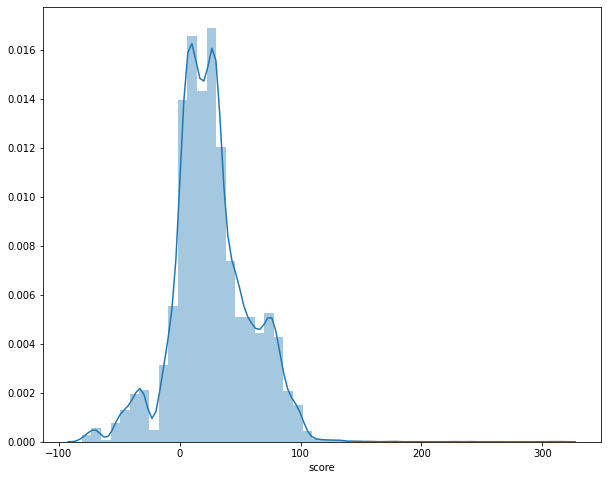

In [346]:
# lets model, but lets create our baseline
print(f'The mean score is: {y_train.mean()}')
print(f'The median score is: {y_train.median()}')
sns.distplot(y_train)

In [347]:
# based on the distribution of the data, median will be a good representation of the baseline
baseline = y_train.median()

# predict using the baseline
baseline_pred = np.full_like(y_train, baseline)
baseline_pred

array([24., 24., 24., ..., 24., 24., 24.])

In [348]:
# calculate rmse for baseline prediction
baseline_rmse = (mean_squared_error(baseline_pred, y_train))**(1/2)
baseline_rmse

31.768240769820185

In [349]:
# create a linear model
lm = LinearRegression(normalize = True, n_jobs = -1)

# fit the model
lm = lm.fit(X_train_scaled, y_train)

# predict
y_train_pred = lm.predict(X_train_scaled)

# calculating root mean squared error
lm_rmse = (mean_squared_error(y_train, y_train_pred)) ** (1/2)

In [350]:
# lets create a dataframe that stores the baseline and the rmse for different models

results = pd.DataFrame(columns = ['model_name', 'rmse'])

In [351]:
# adding results to our dataframe
results.model_name = ['Baseline', 'Linear Regression']
results.rmse = [baseline_rmse, lm_rmse ]

**LassoLars**

In [352]:
# create a model object
lars = LassoLars()

# fit with the model object
lars = lars.fit(X_train_scaled, y_train)

# predict
y_train_pred = lars.predict(X_train_scaled)

# calculate rmse 
lars_rmse = (mean_squared_error(y_train, y_train_pred)) ** (1/2)

In [353]:
# adding results to our dataframe
results = results.append({'model_name': 'LassoLars', 'rmse': lars_rmse}, ignore_index = True)


In [354]:
# function that adds the name of the model and the rmse to the results dataframe
def add_results(df, model_name, rmse):
    df = df.append({'model_name': model_name, 'rmse': rmse}, ignore_index = True)
    return df

**Polynomial Features**

In [355]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)


# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)


In [356]:
# now we will use linear regression with this

# create the model object
lm2 = LinearRegression(normalize=True)


# fit the model object
lm2 = lm2.fit(X_train_degree2, y_train)

# predict
y_pred_poly = lm2.predict(X_train_degree2)

# calculate rmse
rmse_poly = (mean_squared_error(y_pred_poly, y_train)) **(1/2)

In [357]:
results = add_results(results, 'Polynomial Features', rmse_poly)
results

,model_name,rmse
0,Baseline,31.768241
1,Linear Regression,31.594847
2,LassoLars,31.703894
3,Polynomial Features,30.917687


**Elastic Net**

In [358]:
from sklearn.linear_model import ElasticNet

In [361]:
# create a model object
en = ElasticNet(random_state = 42)

# fit the model object
en = en.fit(X_train_scaled, y_train)

# predict
y_train_pred = en.predict(X_train_scaled)

# calculate the rmse
rmse_en = (mean_squared_error(y_train_pred, y_train)) **(1/2)

In [362]:
results = add_results(results, 'Elastic Net', rmse_en)
results

,model_name,rmse
0,Baseline,31.768241
1,Linear Regression,31.594847
2,LassoLars,31.703894
3,Polynomial Features,30.917687
4,Elastic Net,31.683893
